# Gadget-2 Analysis Notebook
**Author:** Gabriel Henrique Souza Cardoso <sup>1 #</sup> <br/>
<sup>1</sup> Eötvös Loránd University <br/>
<sup>#</sup> gabrielhsc95@gmail.com <br/>

***Last Update:*** 2020.04.15

This notebook is responsible to read and analyze the data from Gadget-2, the main object of study is the peculiar velocity of particles. There are some specific libraries that need to be installed as seen below, and it does not work on Windows. The features and further explanation of the functions are described as comments or Markdown text. If you have any question you can contact me by gabrielhsc95@gmail.com

## Libraries

To read the Gadget-2 files in Python there is the library called pyGadgetReader by Robert Thompson available at <link/>https://bitbucket.org/rthompson/pygadgetreader/src/default/, instruction for instalations are available in the link.

For the map plots, it is necessary Healpy (the reason it does not work on Windows), it is available at <link/>https://healpy.readthedocs.io/en/latest/, it can be installed using <code>pip</code>.

More standard libraries like Numpy, SciPy, and Matplotlip are also used. They can also be install by with <code>pip</code>.

In [1]:
from pygadgetreader import *
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm, logistic, skew, kurtosis

## Gadget-2 Data

Gadget-2 has its own data format, but it can also output in hdf5. The pyGadgetReader can handle both cases.

The function to read the data is <code>readsnap</code>, where first argument is the name of the file without the extension, and second is the property (like pos for position or vel for velocity) and then the type of particle (like dm for dark matter). You can check more details in the link provided in the Libraries block.

In [2]:
# Read the snapshot
file_path = '/media/gabriel/Data/University/ELTE/Thesis/Data/snapshots/s_42/snapshot_025'
data_pos = readsnap(file_path,'pos','dm')
data_vel = readsnap(file_path,'vel','dm')

Returning DM    Positions
Returning DM    Velocities


## Organizing data

The data from the snapshot comes in a list of vector, but it is easier to plot and do some further data selection if they are all separated lists, a list for each direction instead of vectors.

In [3]:
# Rearrange data
X = data_pos[:,0]
Y = data_pos[:,1]
Z = data_pos[:,2]
U = data_vel[:,0]
V = data_vel[:,1]
W = data_vel[:,2]

## 2D Cross-Section Plot

One way to visualize the peculiar velocity data is a cross-section of the snapshot. The next block creates this cross-section in the z-axis, but it is an arbitrary choice, it could have been any axes. The range can be defined in the initial variables, it will be made between <code>z_min</code> and <code>z_max</code>.

The simulated universe is a cube, so the cross-section will be a square. The galaxies are plotted as a semitransparent purple dot, the peculiar velocity vector is black, and its pivot point is the tip.

It also prints information about the maximum and minimum value in each direction and the number of particles selected in the cross-section.

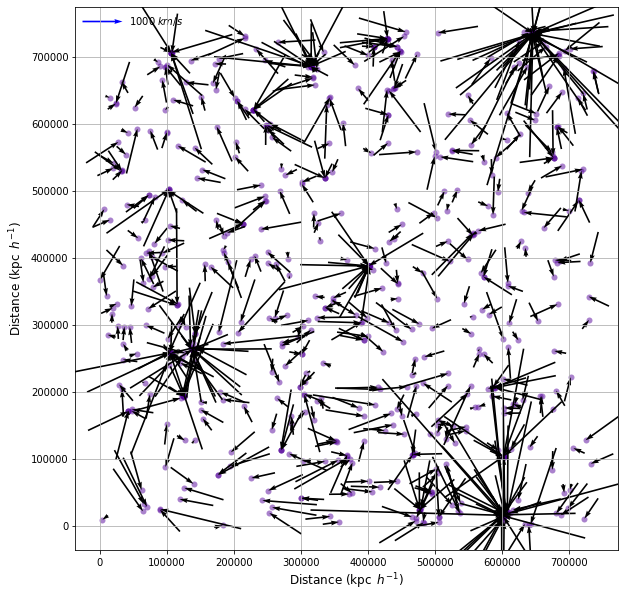

INFO:
670 points selected from a total of 8388608
Maximum speed in 
	 x: 6770.4462890625 
	 y: 6915.65625
Minimum speed in 
	 x: -7541.24267578125 
	 y: -8137.5048828125


In [15]:
# Variables
z_min = 2000.0
z_max = 2050.0
fig_size = 10

# Selection
upper_boundary = np.where(Z < z_max)
lower_boundary = np.where(Z < z_min)
selection = np.setdiff1d(upper_boundary, lower_boundary)

# Plot points
fig, ax = plt.subplots(figsize=(fig_size, fig_size))
ax.scatter(X[selection], Y[selection], color='#56069c', alpha=0.5, linewidths=0.0)

# Plot vectors
Q = ax.quiver(X[selection], Y[selection], U[selection], V[selection],
              pivot='tip', width=0.003, scale=25.0, scale_units='dots')
qk = ax.quiverkey(Q, 0.2, 0.86, 1000, r'$1000 \; km/s$', labelpos='E', coordinates='figure', color='blue')

# Plot settings
ax.grid(True)
ax.set_aspect('equal', 'box')
ax.set_xlabel("Distance (kpc $\, h^{-1}$)", size='large')
ax.set_ylabel("Distance (kpc $\, h^{-1}$)", size='large')
plt.show()

# Print information
print("INFO:")
print(selection.size, "points selected from a total of", int(data_pos.size/3))
print(("Maximum speed in \n\t x: {vx_max} \n\t y: {vy_max}\n" + 
       "Minimum speed in \n\t x: {vx_min} \n\t y: {vy_min}")
       .format(vx_max=np.max(U), vy_max=np.max(V), vx_min=np.min(U), vy_min=np.min(V)))

## 3D Positon Plot

Another way to visualize the data is the 3D position of each particle in the simulation, then it will be possible to see the large scale structure, and its features like the clusters, filaments, wall, and voids.

It is a 3D plot where each particle is plotted as a translucent purple dot, the alpha is set to 0.01, so it easier to see the clustering.

###### Warning

This plot takes time because it is a lot of particles; however, you can set to skip particles, so it doesn't plot every single particle, in the variable <code>skip</code>. This also makes it more clear to see the large scale structure, because if every particle is used the plot is too dense.

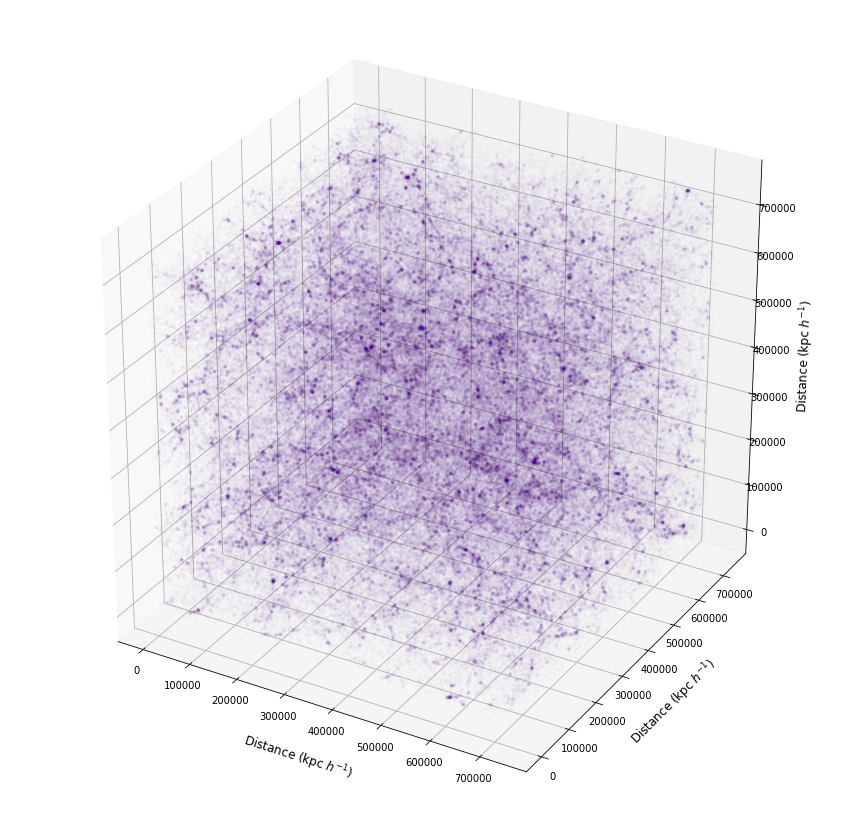

INFO:
524288 points selected from a total of 8388608


In [14]:
# Variables
fig_size = 15
skip = 16

# Selection
selection = np.arange(0, X.size, skip)

# Plot
fig = plt.figure(figsize=(fig_size,fig_size))
ax = fig.gca(projection='3d')
ax.scatter(X[selection], Y[selection], Z[selection], color='#56069c', alpha=0.01, linewidths=0.0, s=10)

# Plot settings
ax.grid(True)
ax.set_xlabel("Distance (kpc $h^{-1}$)", size='large', labelpad=15)
ax.set_ylabel("Distance (kpc $h^{-1}$)", size='large', labelpad=15)
ax.set_zlabel("Distance (kpc $h^{-1}$)", size='large', labelpad=15)
plt.show()

# Print information
print("INFO:")
print(selection.size, "points selected from a total of", int(data_pos.size/3))

## 3D Discrete Vector Field Plot

It is also possible to see the peculiar velocity in a 3D plot. However, it runs into the same problem as the previous plot, it is too crowded, it is not possible to set transparency in the vector and they are quite small almost like a point.

###### Warning

Again, this plot takes time because it is a lot of particles; however, you can set to skip particles, so it doesn't plot every single particle, in the variable <code>skip</code>.

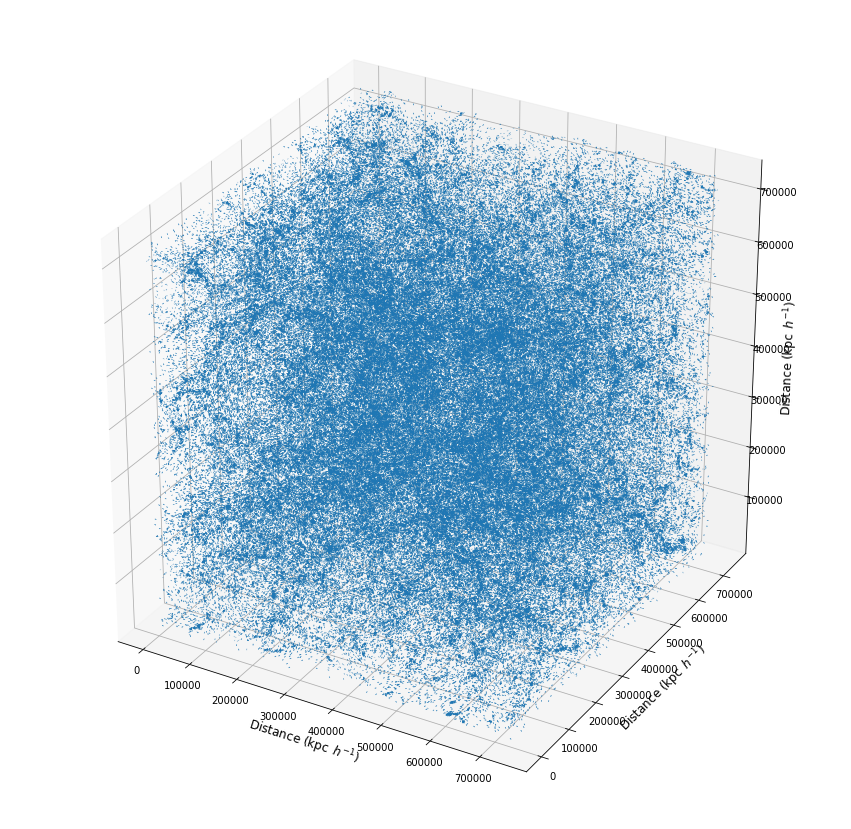

INFO:
262144 points selected from a total of 8388608
Maximum speed in 
	 x: 6770.4462890625 
	 y: 6915.65625 
	 z: 7707.40576171875
Minimum speed in 
	 x: -7541.24267578125 
	 y: -8137.5048828125 
	 z: -7534.11181640625


In [6]:
# Variables
fig_size = 15
skip = 32

# Selection
selection = np.arange(0, X.size, skip)

# Plot
fig = plt.figure(figsize=(fig_size, fig_size))
ax = fig.gca(projection='3d')
ax.quiver(X[selection], Y[selection], Z[selection],
          U[selection], V[selection], W[selection],
          length=1000.0, normalize=True)

# Plot settings
ax.grid(True)
ax.set_xlabel("Distance (kpc $\, h^{-1}$)", size='large')
ax.set_ylabel("Distance (kpc $\, h^{-1}$)", size='large')
ax.set_zlabel("Distance (kpc $\, h^{-1}$)", size='large')
plt.show()

# Print information
print("INFO:")
print(selection.size, "points selected from a total of", int(data_pos.size/3))
print(("Maximum speed in \n\t x: {vx_max} \n\t y: {vy_max} \n\t z: {vz_max}\n" + 
       "Minimum speed in \n\t x: {vx_min} \n\t y: {vy_min} \n\t z: {vz_min}")
       .format(vx_max=np.max(U), vy_max=np.max(V), vz_max=np.max(W),
               vx_min=np.min(U), vy_min=np.min(V), vz_min=np.min(W)))

## Data Selection

This section explains the procedures for the select the data for further analysis, the previous routines were to visualize the simulation in general. Now we are going to make this simulation looks like it was measured from Earth.

### Changing coordinates

In the simulation, we have a privileged view of the universe, but in reality, we can mostly measure properties of the cosmos from Earth's frame.

An example of this privileged perspective is that we cannot see the Hubble flow in the simulated data because it is done in the comoving frame. The distance units are $ \text{kpc} \, h^{-1} $.

To mimic measurements done from Earth, the first step will be to change the origin to the center of the cube. The origin in the simulation is in one of the corners like the next figure. Therefore, we just need to subtract $ \frac{L}{2} $ from every coordinate.

<img src="cube.png"/>

The second step is to select the data in an inscribed sphere, in other words, the data will be selected from the largest sphere that fits the cube. Then we need to convert the cartesian to the spherical, but for now just the radial component as

$$ r_i = \sqrt{x_i^2 + y_i^2 + z_i^2}, $$

then the data will be selected if $ r_i \leqslant \frac{L}{2} $. In the cases of the simulations done in this project the size of the box was $ L = 739000.0 \text{kpc} \, h^{-1} $, so the maximum radius $ r_{max} = 369500.0 \text{kpc} \, h^{-1} $, which is equal the necessary shift in the first step.

Later on, it is also necessary to know the angles, for that it used the function <code>vec2ang</code> from heapy. This function essentially does the following transformation

$$ \theta = \arccos \frac{z}{r} \qquad \phi = \arctan \frac{y}{x} ,$$
    
the advantage of using the function instead of writing our own is that it takes care of the quadrant by itself.

The simulation has period boundary conditions which means that the center of the cube could be defined anywhere; however, for simplicity if has set to the center as if the walls were not connected.

### Pixelisation

After changing to spherical coordinates, we need to pixelated data on the sphere using healpy, that was based on the Hierarchical Equal Area isoLatitude Pixelization (HEALPix). The resolution is set in the variable <code>nside</code>. During this project, it has set to 32 which gives us a resolution of roughly 1° 50' (this can be checked with the function <code>nside2resol</code>, and it is done in the next block).

### Losing the data from the corners

Because of the data selection, We will lose particles from the corner of the cube. Assuming a homogeneous universe, we can compute the percentage of the data that can be used by the ratio of the volumes. As a reminder, the volumes are

$$ V_c = L^3 \qquad V_s = \frac{4}{3}\pi r^3, $$

in our case, $ r = L/2 $, so the ratio is

$$ \frac{V_s}{V_C} = \frac{4}{3} \pi \left( \frac{L}{2} \right)^3 \frac{1}{L^3} = \frac{\pi}{6} = 0.52360 $$

It means that 52.360 \% of the available data is expected to be used. In a simulation of $ 2^{23} = 8388608 $ particles, the information will be collected from roughly $ 4 392 275 $ data points.

### Information speed

If we are trying to imitate measurements done on Earth, then distance also means time, in the sense that, farther objects will show the properties of how it was before not at the present moment, because the information needs to travel.

The best would be to have a snapshot for every distance, but this is impractical because it would require to save a lot of data and the particles are moving which makes it harder to define the right distance. Hence, to solve the problem the maximum radius was divided into 25 equal parts, and a snapshot was saved for the midpoint of these 25 different regions.

Considering $ L = 739000.0 \, \text{kpc} \, h^{-1} \, ( = 500007.4 \, \text{kpc})$, so $ r_{max} = 369500.0 \, \text{kpc} \, h^{-1} \, ( = 250003.7 \, \text{kpc}) $, then the boundaries of the shell are $ r_n = 14780 \cdot n \, \text{kpc} \, h^{-1} \, ( = 10000.148 \cdot n \, \text{kpc})$, where $ n = \{0, \dots, 25\} $, and the midpoints are $ r_m = 7390 \cdot m \, \text{kpc} \, h^{-1} \, ( = 5000.074 \cdot m \, \text{kpc})$, where $ m = \{1, \dots, 25\}$

###### Note

The simulation goes from past to present, so it also saves in that order. This means that the first snapshot (snapshot_000) is the oldest/farthest.

In [7]:
hp.pixelfunc.nside2resol(32, arcmin=True)

109.93556517815699

In [8]:
# Constants
nside = 32
shift = -369500.0

# Data
vps_all = np.array([])

# Information speed problem
r_min = 0.0
r_max = 14780.0
for i in range(25):
    print("#Shell:", i)
    # Load
    file_path = "/media/gabriel/Data/University/ELTE/Thesis/Data/snapshots/s_42/snapshot_{:03d}".format(24-i)
    data_pos = readsnap(file_path,'pos','dm')
    data_vel = readsnap(file_path,'vel','dm')
    
    # Change coordinates
    r = np.sqrt(np.sum(np.square(data_pos + shift), axis=1))
    inside = np.where(r <= r_max)
    outside = np.where(r < r_min)
    particles = np.setdiff1d(inside, outside)
    
    r_min += 14780.0
    r_max += 14780.0
    
    angles = hp.pixelfunc.vec2ang(data_pos[particles] + shift)
    x = np.sin(angles[0])*np.cos(angles[1])
    y = np.sin(angles[0])*np.sin(angles[1])
    z = np.cos(angles[0])

    x = x.reshape((x.size, 1))
    y = y.reshape((y.size, 1))
    z = z.reshape((z.size, 1))

    max_pixel = hp.pixelfunc.nside2npix(nside)
    added_vp = np.zeros(max_pixel)
    density = np.zeros(max_pixel)

    unit_r = np.append(x, y, axis=1)
    unit_r = np.append(unit_r, z, axis=1)

    vps = np.sum(unit_r*data_vel[particles], axis=1)
    vps_all = np.append(vps_all, vps)
    pixels = hp.pixelfunc.ang2pix(nside, angles[0], angles[1])
    
    # Compute data
    unique, count = np.unique(pixels, return_counts=True)
    density[unique] = count

    i = 0
    for p in pixels:
        added_vp[p] += vps[i]
        i += 1

#Shell: 0
Returning DM    Positions
Returning DM    Velocities
#Shell: 1
Returning DM    Positions
Returning DM    Velocities
#Shell: 2
Returning DM    Positions
Returning DM    Velocities
#Shell: 3
Returning DM    Positions
Returning DM    Velocities
#Shell: 4
Returning DM    Positions
Returning DM    Velocities
#Shell: 5
Returning DM    Positions
Returning DM    Velocities
#Shell: 6
Returning DM    Positions
Returning DM    Velocities
#Shell: 7
Returning DM    Positions
Returning DM    Velocities
#Shell: 8
Returning DM    Positions
Returning DM    Velocities
#Shell: 9
Returning DM    Positions
Returning DM    Velocities
#Shell: 10
Returning DM    Positions
Returning DM    Velocities
#Shell: 11
Returning DM    Positions
Returning DM    Velocities
#Shell: 12
Returning DM    Positions
Returning DM    Velocities
#Shell: 13
Returning DM    Positions
Returning DM    Velocities
#Shell: 14
Returning DM    Positions
Returning DM    Velocities
#Shell: 15
Returning DM    Positions
Returning DM 

## Density Distribution

The mass of each particle is not that important, but the mass-energy densities are, and those are set in the cosmological parameters. However, it is possible to check the value by loading the snapshot, and then multiplying by the value set in the parameter file for the simulation, as you can see below

In [13]:
# Read the snapshot
file_path = '/mnt/sda4/University/ELTE/Thesis/Data/snapshots/s_42/snapshot_025'
data_mass = readsnap(file_path,'mass','dm')
print(data_mass)

Returning DM    Mass
[415.41733 415.41733 415.41733 ... 415.41733 415.41733 415.41733]


The mass unit for the simulation was set to $ 10^{10} \, M_{\odot} \, h^{-1} $, so each particle has $ 1.335 \cdot 10^{13} \, M_{\odot} \, h^{-1} $.

Once more, the masses are not important, even more, if they all the same, so we can make it as a natural unit and the density is just the number of particles in that region. This is represented in the next plot, it is the number of all the particles that are in that region of the sky. Note that, it is a 2D surface, the distance from Earth is not taken into account, just its position on the sky.

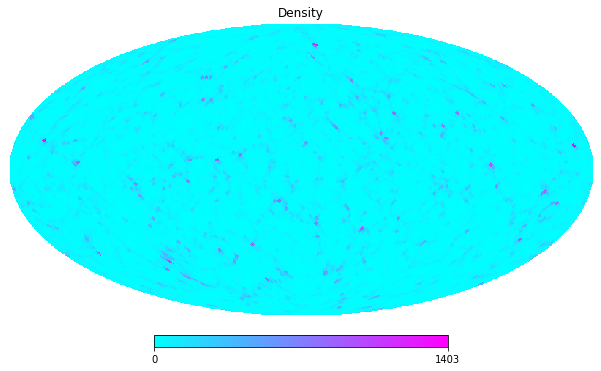

In [10]:
#Plot
hp.visufunc.mollview(density, cmap='cool', title='Density')

It is possible to see the clusterization, but in general the universe homogeneous and empty.

## Density Pixel Distribution

Another way to visualize the same mass distribution is by looking at the histogram of pixels used. The pixelization scheme used was RING, so in general, the id - 1 is on the left and id + 1 is on the right.

Since it is a histogram, we can play with the number of bins, if it is set to the number of pixels, we will see the same as before, but in a different format; however, we can see in larger ring patches by changing the variable <code>group_by</code>, in this case, it is easier to see the homogeneity.

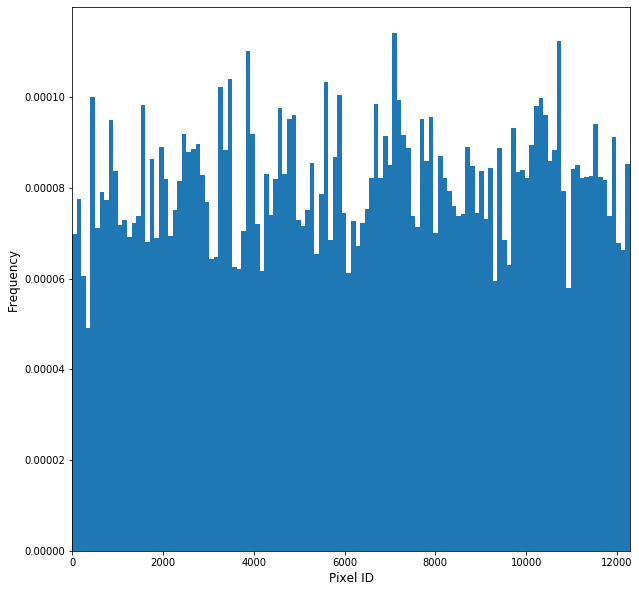

INFO:
#bins = 122


In [11]:
# Variables
fig_size = 10
group_by = 100

# Selection
total_pixels = hp.pixelfunc.nside2npix(nside)
n_bins = int(total_pixels/group_by)
last_pixel = hp.pixelfunc.nside2npix(nside)

# Plot
fig, ax = plt.subplots(figsize=(fig_size, fig_size))
plt.hist(pixels, bins=n_bins, density=True)

# Plot settings
ax.set_xlabel("Pixel ID", size='large')
ax.set_xlim(0, last_pixel)
ax.set_ylabel("Frequency", size='large')
plt.show()

# Print information
print("INFO:")
print("#bins =", n_bins)

## Net flow Graph

This project is mostly interested in peculiar velocity. To see some of its properties we can analyze the net flow. It is the average velocity of particles in each direction of the sky. Even though the simulation has $ 2^{23} $ particles, there might be pixels with zero particles, for those, it is not possible to compute the net flow, so they are listed as bad pixels and are shown in black in the final image.

To keep white as representing zero, the plot finds the max absolute value and uses it for the maximum and minimum value. Negative velocity is represented in blue because it represents a blueshift, and the positive is red because it is a redshift.

/home/gabriel/.local/lib/python3.6/site-packages/healpy/pixelfunc.py:345: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/home/gabriel/.local/lib/python3.6/site-packages/healpy/projaxes.py:1184: RuntimeWarning: invalid value encountered in less
  result.data[result.data < 0] = 0.0
/home/gabriel/.local/lib/python3.6/site-packages/healpy/projaxes.py:1185: RuntimeWarning: invalid value encountered in greater
  result.data[result.data > 1] = 1.0


Bad pixels: [6968]


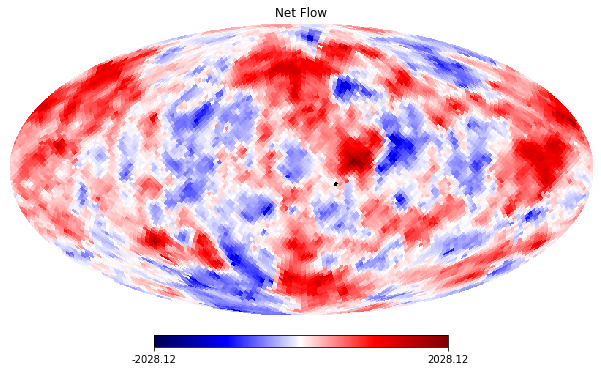

In [12]:
# Selection
zero_index = np.where(density == 0.0)
density[zero_index] = np.nan
normalized = added_vp/density

# Plot
# Find the limits
max_value = np.nanmax(normalized)
min_value = np.nanmin(normalized)*-1.0
if max_value > min_value:
    values_range = max_value
else:
    values_range = min_value
    
hp.visufunc.mollview(normalized, cmap='seismic', badcolor='black',
                     min=-values_range, max=values_range, title='Net Flow')

print("Bad pixels:", zero_index[0])

## Peculiar Velocity Distribution

The most important characteristic of the peculiar velocity that we are looking for is its distribution. Knowing it we can infer information about the limits and the variance of this property.

In the first plot in this notebook, we can see that there is no preferential direction, which is expected from theory since the universe isotropic. The values as an initial guess could say that are random and centered at zero, then a Gaussian distribution is a good fit.

The distribution is defined as

$$ \text{PDF}_{\text{Gaussian}}(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2}, $$

where $ \mu $ is the mean and $ \sigma $ is the standard deviation, to implement it, we are going to import <code>norm</code> from SciPy. To check if it is a good fit R-squared will be used, for that, a function is defined in the next block.

In [13]:
def r_squared(data, fit):
    """
    Calculates the R-squared.
    
    This function calculates R-squared based on the correlation matrix.
    The arguments of the function are the y-values of the data and the function
    it has been fitted to. Both must have the same length.
    
    param
    -------
    data : array containing the y-values of the data
    fit  : array containing the y-values of the fit
    
    return
    -------
    the calculated R-squared
    """
    correlation_matrix = np.corrcoef(data, fit)
    correlation_xy = correlation_matrix[0,1]
    return correlation_xy**2

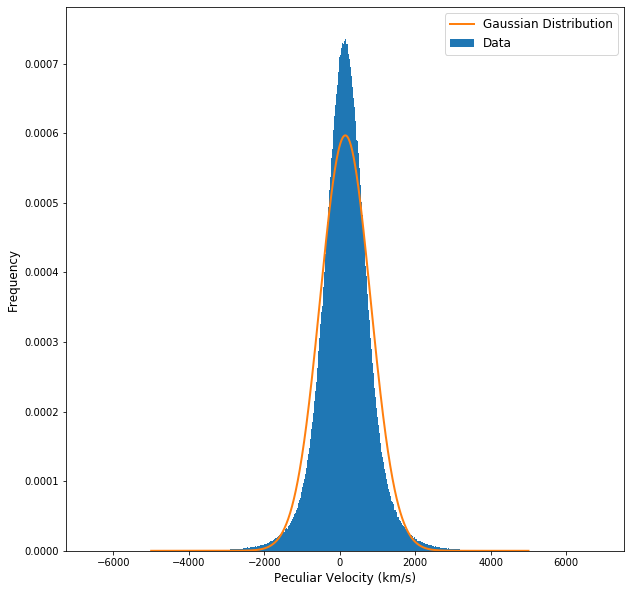

INFO:
vp = 146.15267342635119 ± 668.1822273667105 km/s (Gaussian)
#particles: 4283936

Property Data Distribution
mean 146.15267342635119 146.15267342635119
variance 446467.48896873853 446467.4889687385
skewness 0.018656839587031366 0.0
kurtosis 3.1661403562262347 0.0

R^2: 0.9710915514786627


In [14]:
# Variables
fig_size = 10
n_bins = 1000

# Compute data
mean = np.mean(vps_all)
std = np.std(vps_all)

# Plot
fig, ax = plt.subplots(figsize=(fig_size, fig_size))
data_hist = plt.hist(vps_all, bins=n_bins, density=True, label='Data')
x = np.linspace(-5000, 5000, 1000)
plt.plot(x, norm.pdf(x, loc=mean, scale=std), linewidth=2, label='Gaussian Distribution')


#Plot settings
ax.set_xlabel("Peculiar Velocity (km/s)", size='large')
ax.set_ylabel("Frequency", size='large')
plt.legend(prop={'size': 'large'})
plt.show()

# Print information
print("INFO:")
print("vp =", mean, "±", std, "km/s (Gaussian)")
print("#particles:", vps_all.size)
print()

print("Property Data Distribution")
distribuition_stats = norm.stats(loc=mean, scale=std, moments='mvsk')
var = np.var(vps_all)
ske = skew(vps_all)
kur = kurtosis(vps_all)
print("mean", mean, distribuition_stats[0])
print("variance", var, distribuition_stats[1])
print("skewness", ske, distribuition_stats[2])
print("kurtosis", kur, distribuition_stats[3])

# R-squared data
discrete_x = []
for i in range(n_bins):
    x = (data_hist[1][i] + data_hist[1][i+1])/2
    discrete_x.append(x)
    
discrete_x = np.array(discrete_x)
discrete_y = data_hist[0]
continuous_y = norm.pdf(discrete_x, loc=mean, scale=std)
r2 = r_squared(discrete_y, continuous_y)
print()
print("R^2:", r2)

Looking at a single simulation we can see that the mean is not zero and that Gaussian is not a perfect fit. To solve the first problem the best to do is to have more simulations with different initial conditions. The mean is highly dependent on the seed given to the initial conditions.

For the second, we can use a Logistic distribution, which can also be implemented using SciPy by importing <code>logistic</code>. The Probability Density Function is defined as

$$ \text{PDF}_{\text{Logistic}}(x) = \frac{e^{-\frac{x - \mu}{s}}}{s \left( 1 + e^{-\frac{x - \mu}{s}} \right)^2}, $$

where $ \mu $ is them mean again, and $ s $ is the scale. There is an analytical conversion between Logistic and Gaussian where the variance is the same by assuming that

$$ s = \frac{\sqrt{3} \sigma_g}{\pi} $$

where $ \sigma_g $ here is the Gaussian standard deviation. However, in general, the variance ($ \sigma^2 $) for a Logistic distribution is

$$ \sigma^2 = \frac{s^3 \pi^2}{3} $$

We will first use the conversion between Gaussian and Logistic, and then find the best scale parameter based on R-squared.

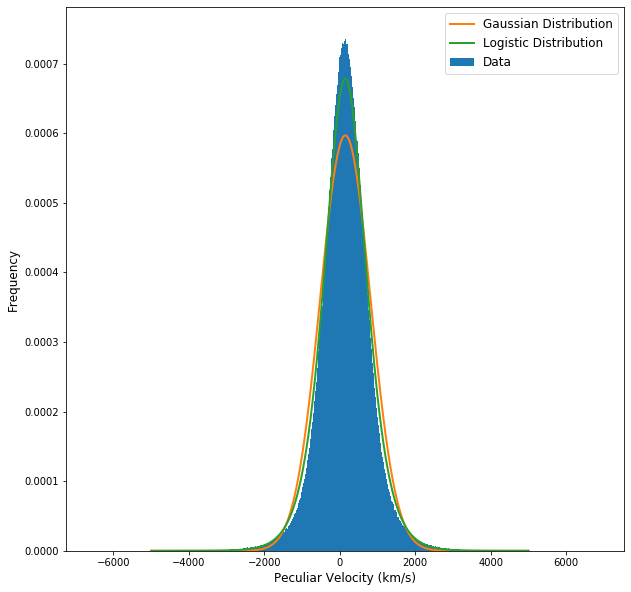

INFO:
vp = 146.15267342635119 ± 668.1822273667105 km/s (Logistic)
#particles: 4283936

Property Data Distribution
mean 146.15267342635119 146.15267342635119
variance 446467.48896873853 446467.4889687385
skewness 0.018656839587031366 0.0
kurtosis 3.1661403562262347 1.2

Scale: 368.3881693545612
R^2: 0.9954853335962595


In [15]:
# Variables
fig_size = 10
n_bins = 1000

# Compute Data
analytical_scale = np.sqrt(3.0)*std/np.pi

# Plot
fig, ax = plt.subplots(figsize=(fig_size, fig_size))
data_hist = plt.hist(vps_all, bins=n_bins, density=True, label='Data')
x = np.linspace(-5000, 5000, 1000)
plt.plot(x, norm.pdf(x, loc=mean, scale=std), linewidth=2, label='Gaussian Distribution')
plt.plot(x, logistic.pdf(x, loc=mean, scale=analytical_scale), linewidth=2, label='Logistic Distribution')

# Plot Settings
ax.set_xlabel("Peculiar Velocity (km/s)", size='large')
ax.set_ylabel("Frequency", size='large')
plt.legend(prop={'size': 'large'})
plt.show()


# Print information
print("INFO:")
print("vp =", mean, "±", std, "km/s (Logistic)")
print("#particles:", vps_all.size)
print()

print("Property Data Distribution")
distribuition_stats = logistic.stats(loc=mean, scale=analytical_scale, moments='mvsk')
var = np.var(vps_all)
ske = skew(vps_all)
kur = kurtosis(vps_all)
print("mean", mean, distribuition_stats[0])
print("variance", var, distribuition_stats[1])
print("skewness", ske, distribuition_stats[2])
print("kurtosis", kur, distribuition_stats[3])

## R-squared data
discrete_x = []
for i in range(n_bins):
    x = (data_hist[1][i] + data_hist[1][i+1])/2
    discrete_x.append(x)
    
discrete_x = np.array(discrete_x)
discrete_y = data_hist[0]
continuous_y = logistic.pdf(discrete_x, loc=mean, scale=analytical_scale)
r2 = r_squared(discrete_y, continuous_y)
print()
print("Scale:", analytical_scale)
print("R^2:", r2)

We went from $ R^2 = 0.9769253213044234 $ in the Gaussian fit to $ R^2 = 0.9977310800189805 $ in the Logistic fit.

It is a better fit using the analytical method, but we can also try it numerically to find an even better scale parameter. To do that, we simply guess values until we find a better one based on R-squared.

In [16]:
scales = np.arange(analytical_scale-50.0, analytical_scale+50.0, 0.001)
r_squareds = []
for s in scales:
    continuous_y = logistic.pdf(discrete_x, loc=mean, scale=s)
    r2 = r_squared(discrete_y, continuous_y)
    r_squareds.append(r2)

max_value = np.max(r_squareds)
index = r_squareds.index(max_value)
new_scale = scales[index]
print("scale:", new_scale)
print("R^2:", max_value)

scale: 333.64916935420035
R^2: 0.9996521801886272


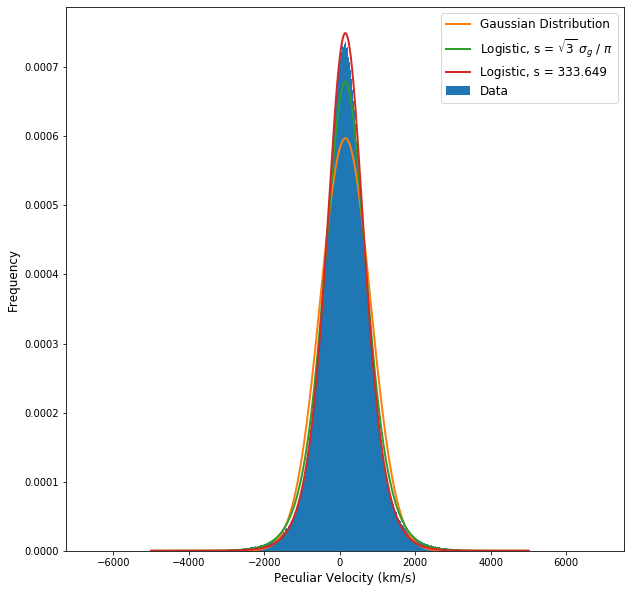

INFO:
vp = 146.15267342635119 ± 605.1726512519234 km/s (Logistic)
#particles: 4283936

Property Data Distribution
mean 146.15267342635119 146.15267342635119
variance 446467.48896873853 366233.9378232822
skewness 0.018656839587031366 0.0
kurtosis 3.1661403562262347 1.2

Scale: 333.64916935420035
R^2: 0.9996521801886272


In [17]:
# Variables
fig_size = 10
n_bins = 1000

# Compute data
new_std = np.sqrt(np.square(new_scale*np.pi)/3)

# Plot
fig, ax = plt.subplots(figsize=(fig_size, fig_size))
data_hist = plt.hist(vps_all, bins=n_bins, density=True, label='Data')
x = np.linspace(-5000, 5000, 1000)
plt.plot(x, norm.pdf(x, loc=mean, scale=std), 
         linewidth=2, label='Gaussian Distribution')
plt.plot(x, logistic.pdf(x, loc=mean, scale=analytical_scale), 
         linewidth=2, label='Logistic, s = $\sqrt{3}$ $\sigma_g$ / $\pi$')
plt.plot(x, logistic.pdf(x, loc=mean, scale=new_scale), 
         linewidth=2, label='Logistic, s = {scale}'.format(scale=np.around(new_scale, decimals=3)))

#Plot Settings
ax.set_xlabel("Peculiar Velocity (km/s)", size='large')
ax.set_ylabel("Frequency", size='large')
plt.legend(prop={'size': 'large'})
plt.show()

# Print information
print("INFO:")
print("vp =", mean, "±", new_std, "km/s (Logistic)")
print("#particles:", vps_all.size)
print()

print("Property Data Distribution")
distribuition_stats = logistic.stats(loc=mean, scale=new_scale, moments='mvsk')
var = np.var(vps_all)
ske = skew(vps_all)
kur = kurtosis(vps_all)
print("mean", mean, distribuition_stats[0])
print("variance", var, distribuition_stats[1])
print("skewness", ske, distribuition_stats[2])
print("kurtosis", kur, distribuition_stats[3])

# R-squared data
discrete_x = []
for i in range(n_bins):
    x = (data_hist[1][i] + data_hist[1][i+1])/2
    discrete_x.append(x)
    
discrete_x = np.array(discrete_x)
discrete_y = data_hist[0]
continuous_y = logistic.pdf(discrete_x, loc=mean, scale=new_scale)
r2 = r_squared(discrete_y, continuous_y)
print()
print("Scale:", new_scale)
print("R^2:", r2)

By trying to find the best fit we went from $ R^2 = 0.9977310800189805 $ to $ R^2 = 0.9998579772912298 $, and we also reduced the variance value from $ \sigma^2 = 1062648.9329531647 $ to $ \sigma^2 = 922365.9815452571$.

## More simulations

As mentioned before, the best is to do multiple simulations, and it was done 5 different ones for this project, the seeds were 42, 84, 126, 168, and 210.

Now we can do the same analysis as before in all these simulations, it shows the improvements from Gaussian, to Logistic with the same variance as the Gaussian and finally the best fit for Logistic. Note that the number of particles changes because of the selection procedure, we are not using all the particles from the simulation.

In [18]:
# Stops matplotlib to show the histogram plots
%matplotlib agg

# Print information
print("INFO:")
for seed in range(42, 211, 42):
    file_path = "/media/gabriel/Data/University/ELTE/Thesis/Data/vps/vps_planck_s{s}.npy".format(s=seed)
    vps = np.load(file_path, allow_pickle=True)

    # Compute data
    n_bins = 1000
    mean = np.mean(vps)
    std = np.std(vps)
    analytical_scale = np.sqrt(3.0)*std/np.pi
    
    data_hist = plt.hist(vps, bins=n_bins, density=True)
    
    discrete_x = []
    for i in range(n_bins):
        x = (data_hist[1][i] + data_hist[1][i+1])/2
        discrete_x.append(x)

    discrete_x = np.array(discrete_x)
    discrete_y = data_hist[0]
    
    scales = np.arange(analytical_scale-50.0, analytical_scale+50.0, 0.001)
    r_squareds = []
    for s in scales:
        continuous_y = logistic.pdf(discrete_x, loc=mean, scale=s)
        r2 = r_squared(discrete_y, continuous_y)
        r_squareds.append(r2)
    
    max_value = np.max(r_squareds)
    index = r_squareds.index(max_value)
    new_scale = scales[index]
    new_std = np.sqrt(np.square(new_scale*np.pi)/3)

    #Print information
    print("General:" )
    print("Seed:", seed)
    print("#particles:", vps.size)
    print()
    
    print("Gaussian Distribution:")
    print("vp =", mean, "±", std, "km/s")
    print()
    print("Property Data Distribution")
    distribuition_stats = norm.stats(loc=mean, scale=std, moments='mvsk')
    var = np.var(vps)
    ske = skew(vps)
    kur = kurtosis(vps)
    print("mean", mean, distribuition_stats[0])
    print("variance", var, distribuition_stats[1])
    print("skewness", ske, distribuition_stats[2])
    print("kurtosis", kur, distribuition_stats[3])
    # R-squared data
    discrete_y = data_hist[0]
    continuous_y = norm.pdf(discrete_x, loc=mean, scale=std)
    r2 = r_squared(discrete_y, continuous_y)
    print()
    print("R^2:", r2)
    print()
    
    print("Logistic Distribution, scale = {s}:".format(s=analytical_scale))
    print("vp =", mean, "±", std, "km/s")
    print()
    print("Property Data Distribution")
    distribuition_stats = logistic.stats(loc=mean, scale=analytical_scale, moments='mvsk')
    print("mean", mean, distribuition_stats[0])
    print("variance", var, distribuition_stats[1])
    print("skewness", ske, distribuition_stats[2])
    print("kurtosis", kur, distribuition_stats[3])
    # R-squared data
    continuous_y = logistic.pdf(discrete_x, loc=mean, scale=analytical_scale)
    r2 = r_squared(discrete_y, continuous_y)
    print()
    print("R^2:", r2)
    print()

    print("Logistic Distribution, scale = {s}:".format(s=new_scale))
    print("vp =", mean, "±", new_std, "km/s")
    print()
    print("Property Data Distribution")
    distribuition_stats = logistic.stats(loc=mean, scale=new_scale, moments='mvsk')
    print("mean", mean, distribuition_stats[0])
    print("variance", var, distribuition_stats[1])
    print("skewness", ske, distribuition_stats[2])
    print("kurtosis", kur, distribuition_stats[3])
    print()
    print("R^2:", max_value)
    print("\n\n")

INFO:
General:
Seed: 42
#particles: 4283936

Gaussian Distribution:
vp = 146.15267342947382 ± 668.1822273852509 km/s

Property Data Distribution
mean 146.15267342947382 146.15267342947382
variance 446467.4889935152 446467.4889935152
skewness 0.018656839605372757 0.0
kurtosis 3.16614035663485 0.0

R^2: 0.9710915514726022

Logistic Distribution, scale = 368.3881693647831:
vp = 146.15267342947382 ± 668.1822273852509 km/s

Property Data Distribution
mean 146.15267342947382 146.15267342947382
variance 446467.4889935152 446467.4889935152
skewness 0.018656839605372757 0.0
kurtosis 3.16614035663485 1.2

R^2: 0.9954853335938666

Logistic Distribution, scale = 333.6491693644222:
vp = 146.15267342947382 ± 605.1726512704639 km/s

Property Data Distribution
mean 146.15267342947382 146.15267342947382
variance 446467.4889935152 366233.93784572254
skewness 0.018656839605372757 0.0
kurtosis 3.16614035663485 1.2

R^2: 0.9996521801885492



General:
Seed: 84
#particles: 4413731

Gaussian Distribution:
vp

In [19]:
# Allows matplotlib to show plots again
%matplotlib inline 

The next table shows a summary of the information of the previous block. Those are values of the best fit and the particles of each simulation.

| seed |         mean        |     $ \sigma $    |       $ R^2 $      | particles |
|:----:|:-------------------:|:-----------------:|:------------------:|:---------:|
|  42  |  146.15267342947382 | 605.1726512704639 | 0.9996521801885492 |  4283936  |
|  84  | -40.092243004218865 | 611.5800539235915 | 0.9995470445076852 |  4413731  |
|  126 |  -65.52277210274625 | 621.2931497725008 | 0.9996034461515564 |  4348618  |
|  168 |  -64.77901510758247 | 649.3794678216001 | 0.9997772042384264 |  4431243  |
|  210 |  77.46790228421446  | 628.0103535900818 | 0.9995308460848529 |  4372177  |

The weighted average by the number of particles is $ 9.879796573021608 \pm 623.2106094435243 \, km/s $, as we can see the mean is closer to zero than any simulation alone. As a reminder, a zero value shows the isotropic universe. The important information is the uncertainty which should be  $ 623 \, km/s $

## Combine universes

Another way to get reach an isotropic universe is to combine all the data into a single distribution. It would be like a universe where groups of particles have different initial conditions. The next block will combine the data and the following save it.

In [20]:
vps_all = np.array([])
for seed in range(42, 211, 42):
    file_path = "/media/gabriel/Data/University/ELTE/Thesis/Data/vps/vps_planck_s{s}.npy".format(s=seed)
    vps = np.load(file_path, allow_pickle=True)
    vps_all = np.append(vps_all, vps)
    
vps_all.size

21849705

In [21]:
np.save('/media/gabriel/Data/University/ELTE/Thesis/Data/vps/vps_planck.npy', vps_all, allow_pickle=True)

A quick check is to see if the total number of particles is the same, and it is. ($ 4283936 + 4413731 + 4348618 + 4431243 + 4372177 = 21849705 $)

For consistency, let's do the same with this distribution. First the Gaussian distribution, but the number of bins will be increased because there is much more data.

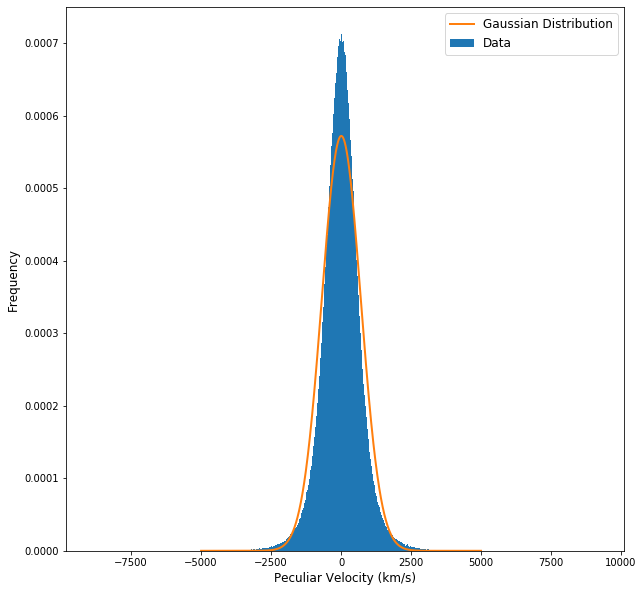

INFO:
vp = 9.87979657302161 ± 697.477601340282 km/s (Gaussian)
#particles: 21849705

Property Data Distribution
mean 9.87979657302161 9.87979657302161
variance 486475.0043713935 486475.0043713934
skewness -6.736559488269239e-05 0.0
kurtosis 3.1931249063968883 0.0

R^2: 0.9718588088535054


In [22]:
# Variables
fig_size = 10
n_bins = 10000

# Compute data
mean = np.mean(vps_all)
std = np.std(vps_all)

# Plot
fig, ax = plt.subplots(figsize=(fig_size, fig_size))
data_hist = plt.hist(vps_all, bins=n_bins, density=True, label='Data')
x = np.linspace(-5000, 5000, 1000)
plt.plot(x, norm.pdf(x, loc=mean, scale=std), linewidth=2, label='Gaussian Distribution')
plt.legend(prop={'size': 'large'})

#Plot settings
ax.set_xlabel("Peculiar Velocity (km/s)", size='large')
ax.set_ylabel("Frequency", size='large')
plt.show()

# Print information
print("INFO:")
print("vp =", mean, "±", std, "km/s (Gaussian)")
print("#particles:", vps_all.size)
print()

print("Property Data Distribution")
distribuition_stats = norm.stats(loc=mean, scale=std, moments='mvsk')
var = np.var(vps_all)
ske = skew(vps_all)
kur = kurtosis(vps_all)
print("mean", mean, distribuition_stats[0])
print("variance", var, distribuition_stats[1])
print("skewness", ske, distribuition_stats[2])
print("kurtosis", kur, distribuition_stats[3])

# R-squared data
discrete_x = []
for i in range(n_bins):
    x = (data_hist[1][i] + data_hist[1][i+1])/2
    discrete_x.append(x)
    
discrete_x = np.array(discrete_x)
discrete_y = data_hist[0]
continuous_y = norm.pdf(discrete_x, loc=mean, scale=std)
r2 = r_squared(discrete_y, continuous_y)
print()
print("R^2:", r2)

Now the Logistic with the same variance.

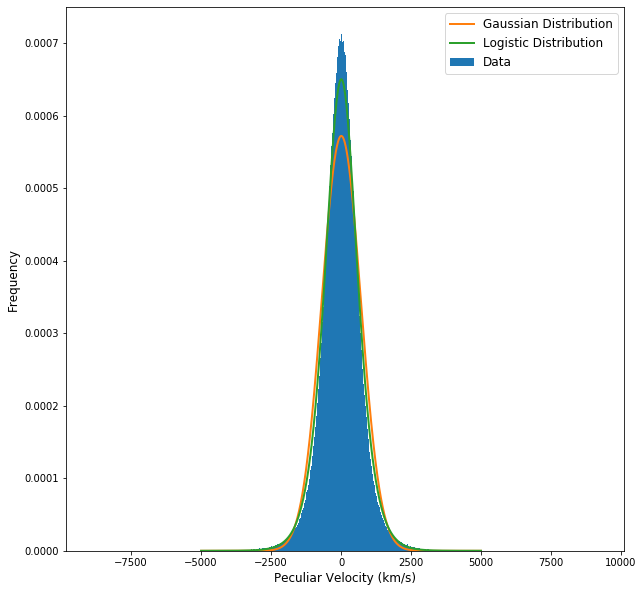

INFO:
vp = 9.87979657302161 ± 697.477601340282 km/s (Logistic)
#particles: 21849705

Property Data Distribution
mean 9.87979657302161 9.87979657302161
variance 486475.0043713935 486475.0043713934
skewness -6.736559488269239e-05 0.0
kurtosis 3.1931249063968883 1.2

Scale: 384.53955552837874
R^2: 0.995641595722435


In [23]:
# Variables
fig_size = 10
n_bins = 10000

# Compute data
analytical_scale = np.sqrt(3.0)*std/np.pi

# Plot
fig, ax = plt.subplots(figsize=(fig_size, fig_size))
data_hist = plt.hist(vps_all, bins=n_bins, density=True, label='Data')
x = np.linspace(-5000, 5000, 1000)
plt.plot(x, norm.pdf(x, loc=mean, scale=std), linewidth=2, label='Gaussian Distribution')
plt.plot(x, logistic.pdf(x, loc=mean, scale=analytical_scale), linewidth=2, label='Logistic Distribution')

# Plot Settings
ax.set_xlabel("Peculiar Velocity (km/s)", size='large')
ax.set_ylabel("Frequency", size='large')
plt.legend(prop={'size': 'large'})
plt.show()

# Print information
print("INFO:")
print("vp =", mean, "±", std, "km/s (Logistic)")
print("#particles:", vps_all.size)
print()

print("Property Data Distribution")
distribuition_stats = logistic.stats(loc=mean, scale=analytical_scale, moments='mvsk')
var = np.var(vps_all)
ske = skew(vps_all)
kur = kurtosis(vps_all)
print("mean", mean, distribuition_stats[0])
print("variance", var, distribuition_stats[1])
print("skewness", ske, distribuition_stats[2])
print("kurtosis", kur, distribuition_stats[3])

# R-squared data
discrete_x = []
for i in range(n_bins):
    x = (data_hist[1][i] + data_hist[1][i+1])/2
    discrete_x.append(x)
    
discrete_x = np.array(discrete_x)
discrete_y = data_hist[0]
continuous_y = logistic.pdf(discrete_x, loc=mean, scale=analytical_scale)
r2 = r_squared(discrete_y, continuous_y)
print()
print("Scale:", analytical_scale)
print("R^2:", r2)

Finally the best fit.

In [24]:
scales = np.arange(analytical_scale-50.0, analytical_scale+50.0, 0.001)
r_squareds = []
for s in scales:
    continuous_y = logistic.pdf(discrete_x, loc=mean, scale=s)
    r2 = r_squared(discrete_y, continuous_y)
    r_squareds.append(r2)

max_value = np.max(r_squareds)
index = r_squareds.index(max_value)
new_scale = scales[index]
print("scale:", new_scale)
print("R^2:", max_value)

scale: 348.0915555280583
R^2: 0.9997805564036596


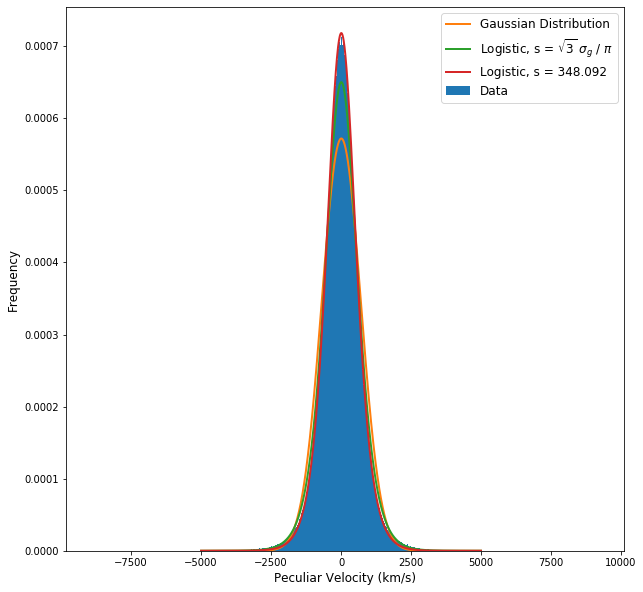

INFO:
vp = 9.87979657302161 ± 631.3682421120922 km/s (Logistic)
#particles: 21849705

Property Data Distribution
mean 9.87979657302161 9.87979657302161
variance 486475.0043713935 398625.85714771325
skewness -6.736559488269239e-05 0.0
kurtosis 3.1931249063968883 1.2

Scale: 348.0915555280583
R^2: 0.9997805564036596


In [25]:
# Variables
fig_size = 10
n_bins = 10000

# Compute data
new_std = np.sqrt(np.square(new_scale*np.pi)/3)

# Plot
fig, ax = plt.subplots(figsize=(fig_size, fig_size))
data_hist = plt.hist(vps_all, bins=n_bins, density=True, label='Data')
x = np.linspace(-5000, 5000, 1000)
plt.plot(x, norm.pdf(x, loc=mean, scale=std), 
         linewidth=2, label='Gaussian Distribution')
plt.plot(x, logistic.pdf(x, loc=mean, scale=analytical_scale), 
         linewidth=2, label='Logistic, s = $\sqrt{3}$ $\sigma_g$ / $\pi$')
plt.plot(x, logistic.pdf(x, loc=mean, scale=new_scale), 
         linewidth=2, label='Logistic, s = {scale}'.format(scale=np.around(new_scale, decimals=3)))
plt.legend(prop={'size': 'large'})

#Plot settings
ax.set_xlabel("Peculiar Velocity (km/s)", size='large')
ax.set_ylabel("Frequency", size='large')
plt.show()

# Print information
print("INFO:")
print("vp =", mean, "±", new_std, "km/s (Logistic)")
print("#particles:", vps_all.size)
print()

print("Property Data Distribution")
distribuition_stats = logistic.stats(loc=mean, scale=new_scale, moments='mvsk')
var = np.var(vps_all)
ske = skew(vps_all)
kur = kurtosis(vps_all)
print("mean", mean, distribuition_stats[0])
print("variance", var, distribuition_stats[1])
print("skewness", ske, distribuition_stats[2])
print("kurtosis", kur, distribuition_stats[3])

#R-squared data
discrete_x = []
for i in range(n_bins):
    x = (data_hist[1][i] + data_hist[1][i+1])/2
    discrete_x.append(x)
    
discrete_x = np.array(discrete_x)
discrete_y = data_hist[0]
continuous_y = logistic.pdf(discrete_x, loc=mean, scale=new_scale)
r2 = r_squared(discrete_y, continuous_y)
print()
print("Scale:", new_scale)
print("R^2:", r2)

**REDO**

Using this method we get to a similar result the peculiar velocity is  $ 1.6586566760910129 \pm 983.2450532400641 \, km/s $, the mean is exactly the same, for the uncertainty it is close enough. A rounded value in these case would be $ 983 \, km/s $, and the previous case was $ 978 \, km/s $.

Nevertheless, $ 5 \, km/s $ represents an uncertainty of $ 1.632 \cdot 10^{-5} $ in the redshift and $ 7.233 \cdot 10^{-2} \, Mpc $ in the luminosity distance. Once more, the value used for the peculiar velocity uncertainty was $ 975 \, km/s $ which leds to a uncertainty of $ 3.183 \cdot 10^{-3} $ in the redshift and $ 14.109 \, km/s $ in the luminosity distance. To adjust for the proper selection we would need to add $ 3 \, km/s $ in the uncertainty, but it will be added $ 5 \, km/s $ to account for the second method as well. There are more explanions about these values in the notebook about the Peculiar Velocity Correction, the addition doesn't work 100% for all the flags, but it is a good approximation.

## Density of particles in each shell by time

The simulation is a dynamical system, which means that particles are constantly moving. Therefore, a particle could move from a shell to another between the saving points. For example, that would happen if the particle is moving towards the center of the cube and it is close to the boundaries of a shell. Therefore, we would overcount this particle.

There is also the opposite case, where a particle is moving away from the center and it is close to the border of the shell. In this case, we would just lose the particle and not count it at all.

To remove the effect of that, it is good to have a large number of particles, so this becomes irrelevant. The original simulation had $ 2^{23} $ particles, and all the simulation after the data selection had more than $ 2^{22} $ particles as expected since the selection is above half of the particles.

Let's check how much it affects our case, for that we are going to look at the density of particles in each shell or all the snapshots. If this stays roughly constant then there was not much movement of particles between shell through time.

We are going to look at density values and not at the number of particles because the volume of each shell is different, so we can compare all together, and it is a good test to see if the simulated universes are actually homogeneous. The volume can be calculate as

$$ V_{shell} = \frac{4}{3} \pi (r_{max}^3 - r_{min}^3) ,$$

the volumes in our case are 0.013, 0.095, 0.257, 0.500, 0.825, 1.231, 1.718, 2.286, 2.935, 3.665, 4.476, 5.369, 6.343, 7.398, 8.534, 9.751, 11.049, 12.429, 13.889, 15.431, 17.054, 18.758, 20.543, 22.410, and 24.357 all in $ 10^{6} Mpc^3 h^{-3}$. It spans orders of magniture, that's why it is better to use density.

###### Warning

The next block takes time because it has to do the selection in each snapshot.

In [14]:
#Constant
shift = -369500.0

# Data
density_particles = []
for snap in range(26):
    print("snapshot_{:03d}".format(snap))
    # Load the snapshot
    file_path = "/mnt/sda4/University/ELTE/Thesis/Data/snapshots/s_42/snapshot_{:03d}".format(snap)
    data_pos = readsnap(file_path,'pos','dm')
    
    # Selection
    density_particles_by_shell = []
    r_min = 0.0
    r_max = 14780.0
    for j in range(25):
        print("shell:", j, end='\r')
        r = np.sqrt(np.sum(np.square(data_pos + shift), axis=1))
        inside = np.where(r <= r_max)
        outside = np.where(r < r_min)
        particles = np.setdiff1d(inside, outside)
        volume = (4.0*np.pi/3.0)*(np.power(r_max, 3) - np.power(r_min, 3))
        density = particles.size/volume
        density *= (415.41733*1e10) # particle mass
        
        density_particles_by_shell.append(density)
        
        r_min += 14780.0
        r_max += 14780.0
    
    density_particles.append(density_particles_by_shell)
    
density_particles = np.array(density_particles)

snapshot_000
Returning DM    Positions
snapshot_001
Returning DM    Positions
snapshot_002
Returning DM    Positions
snapshot_003
Returning DM    Positions
snapshot_004
Returning DM    Positions
snapshot_005
Returning DM    Positions
snapshot_006
Returning DM    Positions
snapshot_007
Returning DM    Positions
snapshot_008
Returning DM    Positions
snapshot_009
Returning DM    Positions
snapshot_010
Returning DM    Positions
snapshot_011
Returning DM    Positions
snapshot_012
Returning DM    Positions
snapshot_013
Returning DM    Positions
snapshot_014
Returning DM    Positions
snapshot_015
Returning DM    Positions
snapshot_016
Returning DM    Positions
snapshot_017
Returning DM    Positions
snapshot_018
Returning DM    Positions
snapshot_019
Returning DM    Positions
snapshot_020
Returning DM    Positions
snapshot_021
Returning DM    Positions
snapshot_022
Returning DM    Positions
snapshot_023
Returning DM    Positions
snapshot_024
Returning DM    Positions
snapshot_025
Returning DM

A visual representation is below where the density is in the y-axis and the snapshot from where it was taken is the x-axis. The snapshot also means time, the last one (25) is the present.

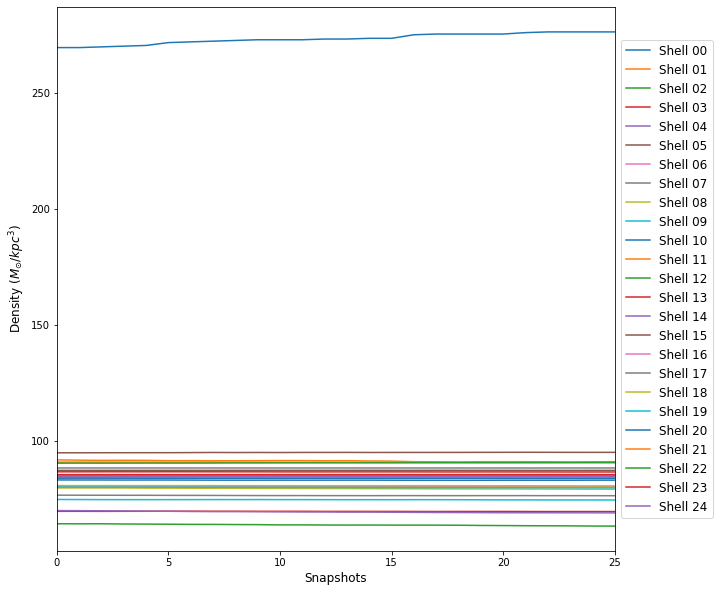

In [15]:
# Variable
fig_size = 10

# Plot
fig, ax = plt.subplots(figsize=(fig_size, fig_size))
for shell in range(25):
    plt.plot(density_particles[:,shell], label='Shell {:02d}'.format(shell))
    
# Plot Settings
ax.set_xlabel("Snapshots", size='large')
ax.set_ylabel("Density ($M_{\odot}$/$kpc^3$)", size='large')
ax.set_xlim(0, 25)
plt.legend(prop={'size': 'large'}, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

As you can see the first shell is overdressed compared to the other ones, this is because the scale is still too short to consider a homogenous universe the largest radius is $ r = 14780 \, \text{kpc} \, h^{-1} \, ( = 10000.148 \, \text{kpc})$. It is also the layer that varies the most, we can see some numerical values below, where the average density was taken from each shell and the maximum absolute deviation from the mean in percentage is shown. Before that, we are going to plot the graph again without the first shell.

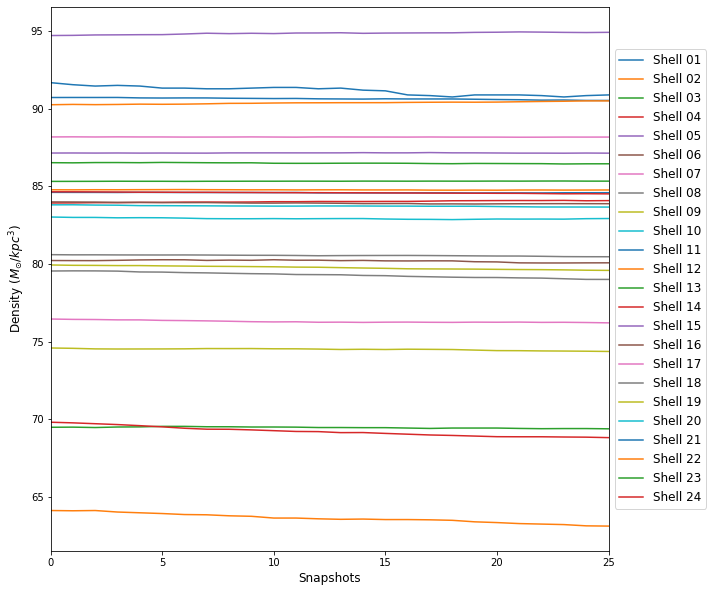

In [17]:
# Variables
fig_size = 10

# Plot
fig, ax = plt.subplots(figsize=(fig_size, fig_size))
for shell in range(1, 25):
    plt.plot(density_particles[:,shell], label='Shell {:02d}'.format(shell))
    
# Plot settings
ax.set_xlabel("Snapshots", size='large')
ax.set_ylabel("Density ($M_{\odot}$/$kpc^3$)", size='large')
ax.set_xlim(0, 25)
plt.legend(prop={'size': 'large'}, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [18]:
# Average and deviation of each shell
for shell in range(25):
    mean = np.mean(density_particles[:, shell])
    print("shell:", shell)
    deviation = np.absolute((density_particles[:, shell] - mean)/mean*100.0)
    v = np.around(mean, decimals=2)
    e = np.around(np.max(deviation), decimals=2)
    print("{value} ± {error}%".format(value=v, error=e))
    print()

shell: 0
273.24 ± 1.41%

shell: 1
91.16 ± 0.56%

shell: 2
63.62 ± 0.8%

shell: 3
69.46 ± 0.11%

shell: 4
69.21 ± 0.86%

shell: 5
94.84 ± 0.15%

shell: 6
80.19 ± 0.16%

shell: 7
76.29 ± 0.21%

shell: 8
79.29 ± 0.37%

shell: 9
74.49 ± 0.17%

shell: 10
82.92 ± 0.12%

shell: 11
90.63 ± 0.12%

shell: 12
90.36 ± 0.14%

shell: 13
86.48 ± 0.06%

shell: 14
84.01 ± 0.11%

shell: 15
87.14 ± 0.03%

shell: 16
83.91 ± 0.09%

shell: 17
88.17 ± 0.01%

shell: 18
80.54 ± 0.1%

shell: 19
79.76 ± 0.22%

shell: 20
83.72 ± 0.1%

shell: 21
84.58 ± 0.03%

shell: 22
84.76 ± 0.03%

shell: 23
85.32 ± 0.02%

shell: 24
84.58 ± 0.08%



As we can see the universe is much more homogenous after the first shell, and there is no much variance between the shells, it is all below 1\%. Gadget-2 also names every particle and saves it into the snapshot, so we can count the specific number of particles that were overcounted, by looking if the same ID was used twice.

We need to compare the ID of the shell in the present with the ID of the next shell in the past, then if there is a match, it means a particle in the past from the previous shell went to the present in the current shell.

In [22]:
#Constant
shift = -369500.0

# Data
total_overcounted = 0
total_particles = 0

for shell in range(0, 24):
    print("shell:", shell)
    print("present")
    # Load the present of the current shell
    file_path = "/mnt/sda4/University/ELTE/Thesis/Data/snapshots/s_42/snapshot_{:03d}".format(24-shell)
    data_pos_present = readsnap(file_path,'pos','dm')
    data_ids_present = readsnap(file_path,'pid','dm')
    r_min = shell*14780.0
    r_max = (shell+1)*14780.0
    
    # Selection
    r = np.sqrt(np.sum(np.square(data_pos_present + shift), axis=1))
    inside = np.where(r <= r_max)
    outside = np.where(r < r_min)
    particles_present = np.setdiff1d(inside, outside)
    total_particles += particles_present.size
    print()
    
    print("past")
    # Load the past of the next shell
    file_path = "/mnt/sda4/University/ELTE/Thesis/Data/snapshots/s_42/snapshot_{:03d}".format(23-shell)
    data_pos_past = readsnap(file_path,'pos','dm')
    data_ids_past = readsnap(file_path,'pid','dm')
    r_min = (shell+1)*14780.0
    r_max = (shell+2)*14780.0
    
    # Selection
    r = np.sqrt(np.sum(np.square(data_pos_past + shift), axis=1))
    inside = np.where(r <= r_max)
    outside = np.where(r < r_min)
    particles_past = np.setdiff1d(inside, outside)
    
    # Compute data
    overcount = np.intersect1d(data_ids_present[particles_present], data_ids_past[particles_past])
    total_overcounted += overcount.size
    
    # Print information
    print("Overcount:", overcount.size, "out of", particles_present.size)
    print(overcount.size/particles_present.size*100.0)
    print("\n\n")

# To count the total number of particles correctly
# There is no such effect in the last shell
shell = 24
print("shell:", shell)
print("present")
# Load the present in the current shell
data_pos_present = readsnap(file_path,'pos','dm')
data_ids_present = readsnap(file_path,'pid','dm')
r_min = shell*14780.0
r_max = (shell+1)*14780.0

# Selection
r = np.sqrt(np.sum(np.square(data_pos_present + shift), axis=1))
inside = np.where(r <= r_max)
outside = np.where(r < r_min)
particles_present = np.setdiff1d(inside, outside)
total_particles += particles_present.size
print("\n\n") 

# Print final information
print("Total:", total_overcounted, "out of", total_particles)
print(total_overcounted/total_particles*100.0)

shell: 0
present
Returning DM    Positions
Returning DM    Particle IDs

past
Returning DM    Positions
Returning DM    Particle IDs
Overcount: 0 out of 899
0.0



shell: 1
present
Returning DM    Positions
Returning DM    Particle IDs

past
Returning DM    Positions
Returning DM    Particle IDs
Overcount: 0 out of 2068
0.0



shell: 2
present
Returning DM    Positions
Returning DM    Particle IDs

past
Returning DM    Positions
Returning DM    Particle IDs
Overcount: 0 out of 3912
0.0



shell: 3
present
Returning DM    Positions
Returning DM    Particle IDs

past
Returning DM    Positions
Returning DM    Particle IDs
Overcount: 3 out of 8360
0.03588516746411483



shell: 4
present
Returning DM    Positions
Returning DM    Particle IDs

past
Returning DM    Positions
Returning DM    Particle IDs
Overcount: 3 out of 13677
0.021934634788330777



shell: 5
present
Returning DM    Positions
Returning DM    Particle IDs

past
Returning DM    Positions
Returning DM    Particle IDs
Overcount

As we can see the double counting of a particle is never larger than 0.08\% in a shell, and in total it is just 0.05561926116893493\%. Therefore, it is not a problem for this setup. Also considering that we are trying to imitate a measurement from Earth, this can be seen as not matching the same galaxy from two different catalogs.

Now to search for the particles that were never counted is more tricky. We need to look at the particles in the past of the current and compare them to the present (time of the current shell) of the next shell. This means that at the time of the current shell particles that were there before are now in the next shell; therefore, they will never be counted. Let's be more explicit with an example, the shell 1 is at the time in snapshot 23, the past of it will be the snapshot 24 (the time in shell 0). We are going to compare the particles in shell 1 at snapshot 24 ( "look at the particles in the past of the current") to the particles in shell 2 in snapshot 23 ("present (time of the current shell) of the next shell").

In [24]:
# Data
total_nevercount = 0

for shell in range(1, 24):
    print("shell:", shell)
    print("past")
    # Load the past of the current shell
    file_path = "/mnt/sda4/University/ELTE/Thesis/Data/snapshots/s_42/snapshot_{:03d}".format(25-shell)
    data_pos_past = readsnap(file_path,'pos','dm')
    data_ids_past = readsnap(file_path,'pid','dm')
    r_min = shell*14780.0
    r_max = (shell+1)*14780.0
    
    # Selection
    r = np.sqrt(np.sum(np.square(data_pos_past + shift), axis=1))
    inside = np.where(r <= r_max)
    outside = np.where(r < r_min)
    particles_past = np.setdiff1d(inside, outside)
    print()
    
    print("present")
    # Load the present of the next shell
    file_path = "/mnt/sda4/University/ELTE/Thesis/Data/snapshots/s_42/snapshot_{:03d}".format(24-shell)
    data_pos_present = readsnap(file_path,'pos','dm')
    data_ids_present = readsnap(file_path,'pid','dm')
    r_min = (shell+1)*14780.0
    r_max = (shell+2)*14780.0
    
    # Selection
    r = np.sqrt(np.sum(np.square(data_pos_present + shift), axis=1))
    inside = np.where(r <= r_max)
    outside = np.where(r < r_min)
    particles_present = np.setdiff1d(inside, outside)
    
    # Compute data
    nevercount = np.intersect1d(data_ids_present[particles_present], data_ids_past[particles_past])
    total_nevercount += nevercount.size
    
    # Print information
    print("Never count:", nevercount.size)
    print("\n\n")
    
# Print final information    
print("Total:", total_nevercount)
print("#particles:", total_particles)
print(total_nevercount/total_particles*100.0)

shell: 1
past
Returning DM    Positions
Returning DM    Particle IDs

present
Returning DM    Positions
Returning DM    Particle IDs
Never count: 3



shell: 2
past
Returning DM    Positions
Returning DM    Particle IDs

present
Returning DM    Positions
Returning DM    Particle IDs
Never count: 0



shell: 3
past
Returning DM    Positions
Returning DM    Particle IDs

present
Returning DM    Positions
Returning DM    Particle IDs
Never count: 0



shell: 4
past
Returning DM    Positions
Returning DM    Particle IDs

present
Returning DM    Positions
Returning DM    Particle IDs
Never count: 7



shell: 5
past
Returning DM    Positions
Returning DM    Particle IDs

present
Returning DM    Positions
Returning DM    Particle IDs
Never count: 8



shell: 6
past
Returning DM    Positions
Returning DM    Particle IDs

present
Returning DM    Positions
Returning DM    Particle IDs
Never count: 5



shell: 7
past
Returning DM    Positions
Returning DM    Particle IDs

present
Returning DM    

The order of the opposite effects of double counting is the same, it is 0.05888962766416837\% of the total number of particles that were actually counted. An analogous effect to imitate a measurement from the Earth frame is those galaxies that are too faint to be able to see.

## Root Mean Square Velocity

Another value that we can extract from the simulations is the root mean square velocity. Since it is a "random" process and there is no preferential flow, the mean is expected to be zero because there will always be a counterbalance in the opposite direction for any vector, similar to the velocity of particles in a gas. Then to have a meaningful value, we can use the square of the values, for that, we have the root mean square velocity definition

$$ v_{rms} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} v_i^2} $$

In [11]:
# Data
velocities = []
particles = []

for seed in range(42, 211, 42):
    print("seed:", seed)
    # Load the peculiar velocity distribution
    file_path = "/mnt/sda4/University/ELTE/Thesis/Data/vps/vps_planck_s{s}.npy".format(s=seed)
    vps = np.load(file_path, allow_pickle=True)
    
    # Compute data
    vrms = np.sqrt(np.sum(np.square(vps))/len(vps))
    velocities.append(vrms)
    particles.append(vps.size)
    
    # Print information
    print("v_rms:", vrms)
    print("#particle:", vps.size)
    print()

seed: 42
v_rms: 683.9795998011176
#particle: 4283936

seed: 84
v_rms: 685.7168137091242
#particle: 4413731

seed: 126
v_rms: 707.207526867258
#particle: 4348618

seed: 168
v_rms: 703.7954834692405
#particle: 4431243

seed: 210
v_rms: 706.4622626862201
#particle: 4372177



We can combine those values doing a weighted average, and also consider the weights for the standard deviation. Numpy does not have it implemented, so the following block does it.

In [12]:
avg = np.average(velocities, weights=particles)
var = np.average((velocities-avg)**2, weights=particles)
print("v_rms = {v} ± {e}".format(v=avg, e=np.sqrt(var)))

v_rms = 697.4710475794783 ± 10.33211208337967


Adding the information to a table, we have

<table>
<thead><tr>
<th style="text-align:center">seed</th>
<th style="text-align:center">$v_{rms}$</th>
<th style="text-align:center">#particles</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">42</td>
<td style="text-align:center">1038.801533570202</td>
<td style="text-align:center">4342053</td>
</tr>
<tr>
<td style="text-align:center">84</td>
<td style="text-align:center">1044.0211626140706</td>
<td style="text-align:center">4405019</td>
</tr>
<tr>
<td style="text-align:center">126</td>
<td style="text-align:center">1074.236100375652</td>
<td style="text-align:center">4373995</td>
</tr>
<tr>
<td style="text-align:center">168</td>
<td style="text-align:center">1049.090579093708</td>
<td style="text-align:center">4416070</td>
</tr>
<tr>
<td style="text-align:center">210</td>
<td style="text-align:center">1055.4223668096602</td>
<td style="text-align:center">4381383</td>
</tr>
</tbody>
</table>

the weighted average by the number of particles is $v_{rms} = 1052.3171616605832 \pm 12.244145633240608 \, km/s$. We can also try the combined universes method as before.

In [34]:
# Load the combined universes peculiar velocity distribution
file_path = "/media/gabriel/Data/University/ELTE/Thesis/Data/vps/vps_planck.npy".format(s=seed)
vps = np.load(file_path, allow_pickle=True)
rms = np.sqrt(np.sum(np.square(vps))/len(vps))

# Print information
print("v_rms:", rms)
print("#particle:", vps.size)

v_rms: 697.547571676455
#particle: 21849705


In this case, it is $v_{rms} = 1052.3883921004056 \, km/s$, which is very close to the previous one and it inside the weighted standard deviation.

Note that the $ v_{rms} $ is equal to the standard deviation if the mean is zero, that's why those numbers are close to Gaussian method to find the uncertainty.

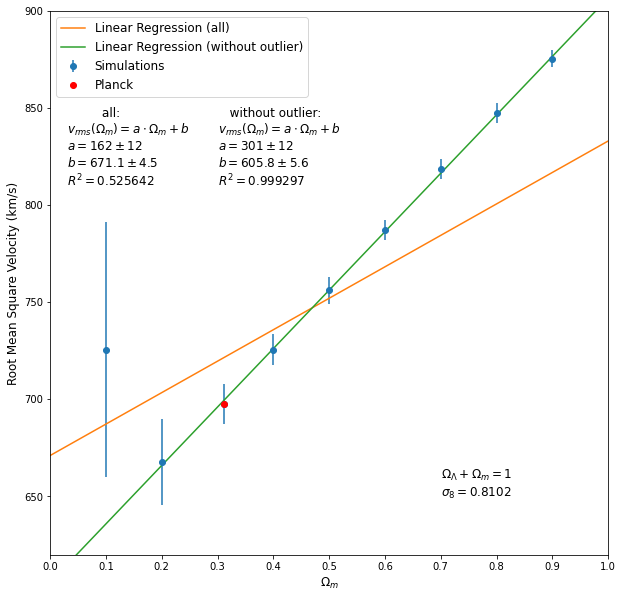

In [2]:
fig_size = 10

fig, ax = plt.subplots(figsize=(fig_size, fig_size))

v_rms = [875.5434368720488, 847.638908904974, 818.8080764655087, 
         787.3676401325762, 756.155810323314, 725.5230711714439,
         697.4710475794783, 667.896309346661, 725.6708341829166]

e_v_rms = [4.587589706121608, 5.261906293018898, 5.0922604475973205,
           5.0922604475973205, 6.953502037081822, 7.967602373173535,
           10.33211208337967, 22.114318405564607, 65.86333686013151]

omega_m = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3111, 0.2, 0.1]


plt.errorbar(omega_m, v_rms, yerr=e_v_rms, fmt='o', label='Simulations')
plt.errorbar(0.3111, 697.4710475794783, fmt='o', c='red', label='Planck')

a = 162
b = 671.1
x = np.arange(0, 1.01, 0.01)
y = a*x + b
plt.plot(x, y, label='Linear Regression (all)')

a = 301
b = 605.8
x = np.arange(0, 1.01, 0.01)
y = a*x + b
plt.plot(x, y, label='Linear Regression (without outlier)')


plt.legend(prop={'size': 'large'}, loc='upper left')

ax.set_ylabel("Root Mean Square Velocity (km/s)", size='large')
ax.set_xlabel("$\Omega_m$", size='large')

text1 = ('         all:\n' +
         '$ v_{rms} (\Omega_m) = a \cdot \Omega_m + b $\n' + 
         '$ a =  162 \pm 12 $\n' + 
         '$ b =  671.1 \pm 4.5 $\n' +
         '$ R^2 = 0.525642$')
plt.annotate(text1, (0.03, 810), size='large')

text2 = ('   without outlier:\n' +
         '$ v_{rms} (\Omega_m) = a \cdot \Omega_m + b $\n' + 
         '$ a =  301 \pm 12 $\n' + 
         '$ b =  605.8 \pm 5.6 $\n' +
         '$ R^2 = 0.999297$')
plt.annotate(text2, (0.3, 810), size='large')

text3 = ('$ \Omega_{\Lambda} + \Omega_m = 1 $\n' +
         '$ \sigma_8 = 0.8102$')
plt.annotate(text3, (0.7, 650), size='large')

plt.xlim(0, 1)
plt.xticks(np.arange(0.0, 1.1, 0.1))
plt.ylim(620, 900)
plt.show()

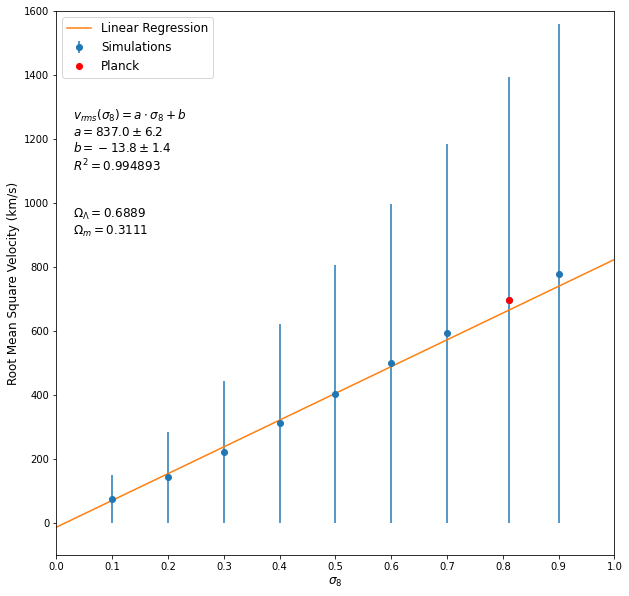

In [3]:
fig_size = 10

fig, ax = plt.subplots(figsize=(fig_size, fig_size))

v_rms = [73.91203416898432, 141.44392578162987, 221.6400189420523, 
         310.5554251588559, 403.43667852331436, 498.4149955983001, 
         592.9454753808114, 697.4710475794783, 779.0716878771201]

e_v_rms = [73.91203416898432, 141.44392578162987, 221.6400189420523, 
           310.5554251588559, 403.43667852331436, 498.4149955983001, 
           592.9454753808114, 697.4710475794783, 779.0716878771201]

sigma_8 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8102, 0.9]


plt.errorbar(sigma_8, v_rms, yerr=e_v_rms, fmt='o', label='Simulations')
plt.errorbar(0.8102, 697.4710475794783, fmt='o', c='red', label='Planck')

a = 837.0
b = -13.8
x = np.arange(0, 1.01, 0.01)
y = a*x + b
plt.plot(x, y, label='Linear Regression')
plt.legend(prop={'size': 'large'}, loc='upper left')

ax.set_ylabel("Root Mean Square Velocity (km/s)", size='large')
ax.set_xlabel("$\sigma_8$", size='large')
text1 = ('$ v_{rms} (\sigma_8) = a \cdot \sigma_8 + b $\n' + 
         '$ a =  837.0 \pm 6.2 $\n' + 
         '$ b =  -13.8 \pm 1.4 $\n' +
         '$ R^2 = 0.994893$')
plt.annotate(text1, (0.03, 1100), size='large')
text2 = ('$ \Omega_{\Lambda} = 0.6889 $\n' +
         '$ \Omega_m = 0.3111$')
plt.annotate(text2, (0.03, 900), size='large')
plt.xlim(0, 1)
plt.xticks(np.arange(0.0, 1.1, 0.1))
plt.ylim(-100, 1600)
plt.show()